## Example

Successfully loaded data from: /pscratch/sd/p/pakmasha/enigma_quantum_data_before_resampling/enigma_quantum_data/Amsterdam-VUmc_sub-916002/Amsterdam-VUmc_sub-916002.npy
Data dimensions (timepoints, brain regions): (197, 318)
Analyzing one brain region with index 0
Number of timepoints: 197
Repetition time (TR): 1.8
Frequency range: 0 to 0.2778 Hz
Frequency vector dimension (Frequency bins): (98,)
The frequency vector dimension corresponds to the number of positive frequency bins, which is approximately half the number of timepoints (N/2) excluding the DC component.


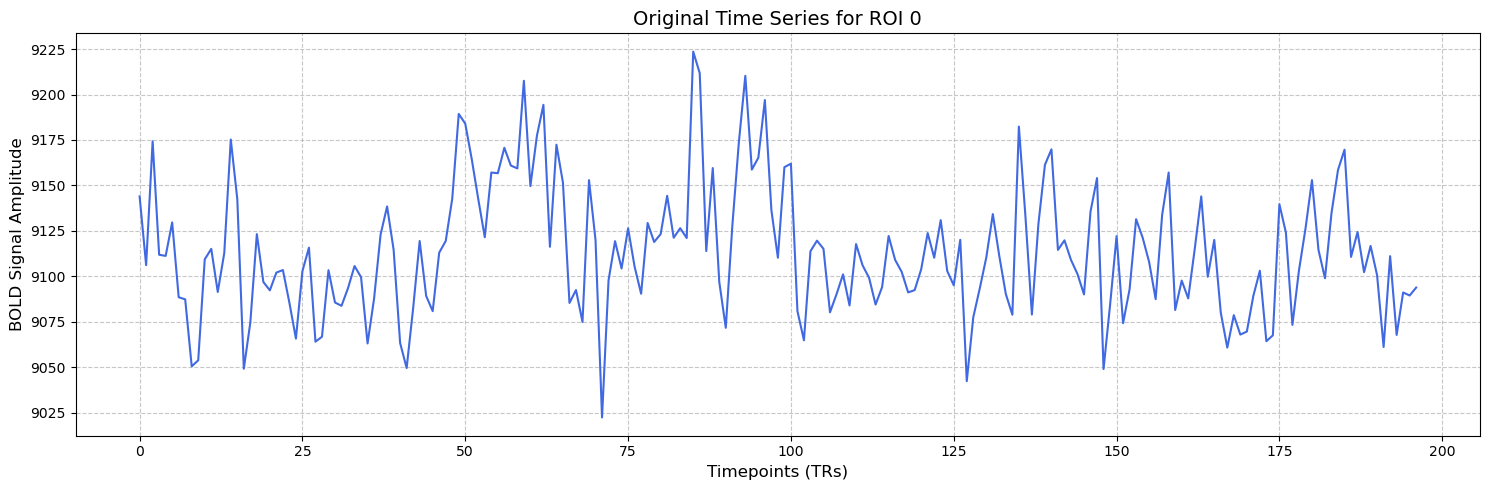

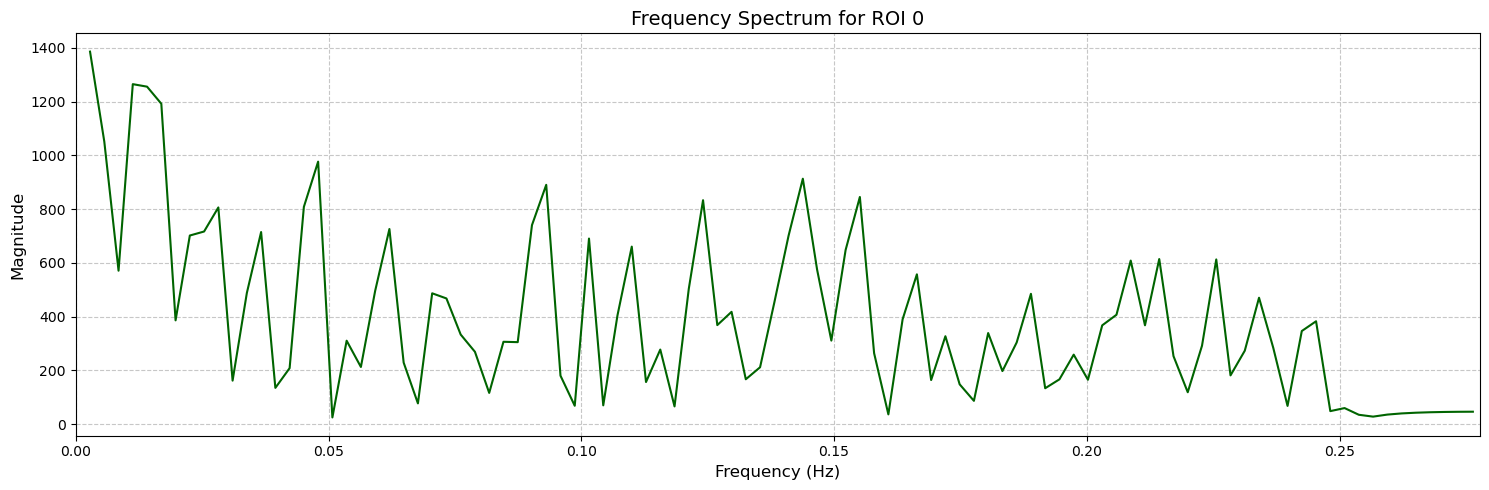

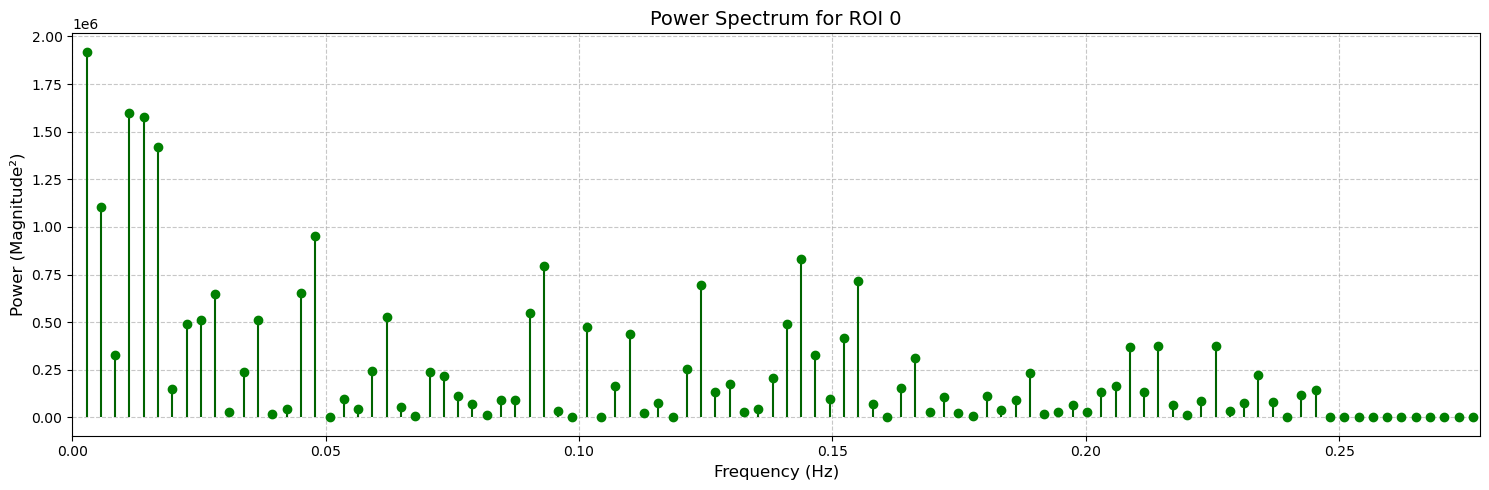

In [8]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# %%
# ---------------------------------------------------------
# Load Data
# ---------------------------------------------------------

# Define file path
file_path = '/pscratch/sd/p/pakmasha/enigma_quantum_data_before_resampling/enigma_quantum_data/Amsterdam-VUmc_sub-916002/Amsterdam-VUmc_sub-916002.npy'

# Load the .npy file
# The shape is expected to be (Timepoints x ROIs)
try:
    data = np.load(file_path)
    print(f"Successfully loaded data from: {file_path}")
    print(f"Data dimensions (timepoints, brain regions): {data.shape}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    print("Please check the path or ensure the drive is mounted.")
    # Stop execution if file is not found (for notebook behavior)
    # raise

# %%
# ---------------------------------------------------------
# Select ROI and Define Parameters
# ---------------------------------------------------------

# Extract the first ROI (index 0)
roi_index = 0
time_series = data[:, roi_index]
n_timepoints = len(time_series)

# Define Repetition Time (TR) in seconds
# IMPORTANT: Replace 2.0 with the actual TR of your fMRI acquisition
# The TR determines the sampling rate and thus the frequency axis
TR = 1.8
sampling_rate = 1.0 / TR
nyquist_freq = sampling_rate / 2.0

# Pre-calculate frequency axis to get dimensions for printing
freq_axis_temp = fftfreq(n_timepoints, d=TR)
positive_mask_temp = freq_axis_temp > 0
freq_axis_pos_temp = freq_axis_temp[positive_mask_temp]

print(f"Analyzing one brain region with index {roi_index}")
print(f"Number of timepoints: {n_timepoints}")
print(f"Repetition time (TR): {TR}")
print(f"Frequency range: 0 to {nyquist_freq:.4f} Hz")
print(f"Frequency vector dimension (Frequency bins): {freq_axis_pos_temp.shape}")
print("The frequency vector dimension corresponds to the number of positive frequency bins, which is approximately half the number of timepoints (N/2) excluding the DC component.")



# %%
# ---------------------------------------------------------
# 1. Visualize Original Time Series
# ---------------------------------------------------------

# %%
# ---------------------------------------------------------
# 1. Visualize Original Time Series
# ---------------------------------------------------------
plt.figure(figsize=(15, 5))
plt.plot(time_series, color='royalblue', linewidth=1.5)
plt.title(f'Original Time Series for ROI {roi_index}', fontsize=14)
plt.xlabel('Timepoints (TRs)', fontsize=12)
plt.ylabel('BOLD Signal Amplitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# %%
# ---------------------------------------------------------
# 2. Perform Fourier Transform
# ---------------------------------------------------------

# Compute the 1-D Discrete Fourier Transform
fft_values = fft(time_series)

# Compute the Frequency bins
freq_axis = fftfreq(n_timepoints, d=TR)

# Filter for Positive Frequencies only
positive_mask = freq_axis > 0
freq_axis_pos = freq_axis[positive_mask]
fft_magnitude_pos = np.abs(fft_values[positive_mask])
fft_power_pos = fft_magnitude_pos ** 2

# %%
# ---------------------------------------------------------
# 3. Visualize Frequency Domain
# ---------------------------------------------------------
plt.figure(figsize=(15, 5))

# Plotting Magnitude Spectrum
plt.plot(freq_axis_pos, fft_magnitude_pos, color='darkgreen', linewidth=1.5)

plt.title(f'Frequency Spectrum for ROI {roi_index}', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.xlim(0, nyquist_freq)  # Show up to Nyquist frequency
plt.grid(True, linestyle='--', alpha=0.7)

# Optional: Add annotations/markers or log scale if needed
# plt.yscale('log') 

plt.tight_layout()
plt.show()


# %%
# ---------------------------------------------------------
# 4. Visualize Frequency Domain (Power Spectrum)
# ---------------------------------------------------------
plt.figure(figsize=(15, 5))

# Plotting Power Spectrum using stem plot for distinct frequencies
plt.stem(freq_axis_pos, fft_power_pos, basefmt=" ", linefmt='darkgreen', markerfmt='go')

plt.title(f'Power Spectrum for ROI {roi_index}', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Power (Magnitude²)', fontsize=12)
plt.xlim(0, nyquist_freq)  # Show up to Nyquist frequency
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Create matrices for PCA

Target Frequency Grid: 0.01 - 0.1 Hz
Step Size: 0.0025 Hz
Grid Dimensions: (37,)
Total .npy files found: 1706
Subjects retained (TR <= 2.0s): 1706

--- Verification Step ---
Subject: Barcelona-HCPB_sub-008
  TR: 2
  Original Freq Vector Dim: (119,)
  Interpolated Freq Vector Dim: (37,)
Subject: Yale-Pittinger-HCP-Prisma_sub-YaleHCPPrismapb3225
  TR: 0.8
  Original Freq Vector Dim: (384,)
  Interpolated Freq Vector Dim: (37,)


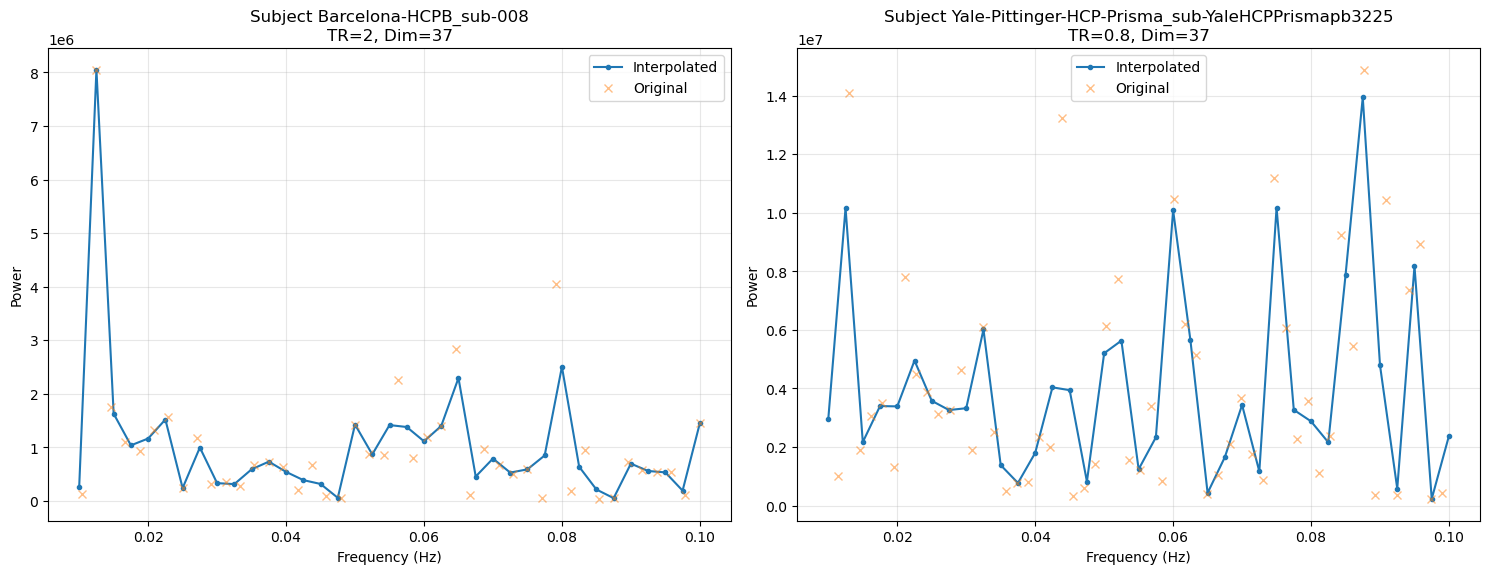


--- Generating PCA Matrices ---
Processed 100/1706 subjects...
Processed 200/1706 subjects...
Processed 300/1706 subjects...
Processed 400/1706 subjects...
Processed 500/1706 subjects...
Processed 600/1706 subjects...
Processed 700/1706 subjects...
Processed 800/1706 subjects...
Processed 900/1706 subjects...
Processed 1000/1706 subjects...
Processed 1100/1706 subjects...
Processed 1200/1706 subjects...
Processed 1300/1706 subjects...
Processed 1400/1706 subjects...
Processed 1500/1706 subjects...
Processed 1600/1706 subjects...
Processed 1700/1706 subjects...

--- Matrix Dimensions ---
ROI 0 PCA Matrix (Subjects x FreqBins): (1706, 37)
All ROIs PCA Matrix (Subjects x [ROIs*FreqBins]): (1706, 11766)

Saved ROI 0 Matrix to: /pscratch/sd/p/pakmasha/enigma_quantum/data/pca_matrix_roi0.npy
Saved All ROIs Matrix to: /pscratch/sd/p/pakmasha/enigma_quantum/data/pca_matrix_all_rois.npy


In [9]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.interpolate import interp1d
import os
import glob
import re

# %%
# ---------------------------------------------------------
# Configuration and Constants
# ---------------------------------------------------------

DATA_ROOT = '/pscratch/sd/p/pakmasha/enigma_quantum_data_before_resampling/enigma_quantum_data'
OUTPUT_DIR = '/pscratch/sd/p/pakmasha/enigma_quantum/data'

# Ensure output directory exists
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Created output directory: {OUTPUT_DIR}")

# Frequency Grid Parameters
# Only analysis subjects with TR <= 2 (Nyquist >= 0.25 Hz)
# Frequency range of interest: 0.01 - 0.1 Hz
TARGET_MIN_FREQ = 0.01
TARGET_MAX_FREQ = 0.1
# Defining step size based on a typical scan length. 
# A conservative estimate for resolution (df) is around 0.002 - 0.005 Hz.
# We will use 0.0025 Hz (400 samples/seconds duration implied, or just high resolution)
TARGET_STEP = 0.0025 

TARGET_GRID = np.arange(TARGET_MIN_FREQ, TARGET_MAX_FREQ + TARGET_STEP/1000, TARGET_STEP)
print(f"Target Frequency Grid: {TARGET_MIN_FREQ} - {TARGET_MAX_FREQ} Hz")
print(f"Step Size: {TARGET_STEP} Hz")
print(f"Grid Dimensions: {TARGET_GRID.shape}")

# %%
# ---------------------------------------------------------
# Helper Functions
# ---------------------------------------------------------

def repetition_time(site):
    """
    Returns the TR based on the site name embedded in the string.
    """
    # Note: 'site' argument here effectively handles the full Subject ID string 
    # as long as it contains the site substring.
    if 'Amsterdam-AMC' in site:
        TR = 2.375
    elif 'Amsterdam-VUmc' in site:
        TR = 1.8
    elif 'Barcelona-HCPB' in site:
        TR = 2
    elif 'Bergen' in site:
        TR = 1.8
    elif 'Braga-UMinho-Braga-1.5T' in site:
        TR = 2
    elif 'Braga-UMinho-Braga-1.5T-act' in site:
        TR = 2
    elif 'Braga-UMinho-Braga-3T' in site:
        TR = 1
    elif 'Brazil' in site:
        TR = 2
    elif 'Cape-Town-UCT-Allegra' in site:
        TR = 1.6
    elif 'Cape-Town-UCT-Skyra' in site:
        TR = 1.73
    elif 'Chiba-CHB' in site:
        TR = 2.3
    elif 'Chiba-CHBC' in site:
        TR = 2.3 
    elif 'Chiba-CHBSRPB' in site:
        TR = 2.5 
    elif 'Dresden' in site:
        TR = 0.8 
    elif 'Kyoto-KPU-Kyoto1.5T' in site:
        TR = 2.411 
    elif 'Kyoto-KPU-Kyoto3T' in site:
        TR = 2
    elif 'Kyushu' in site:
        TR = 2.5
    elif 'Milan-HSR' in site:
        TR = 2
    elif 'New-York' in site:
        TR = 1
    elif 'NYSPI-Columbia-Adults' in site:
        TR = 0.85
    elif 'NYSPI-Columbia-Pediatric' in site:
        TR = 0.85
    elif 'Yale-Pittinger-HCP-Prisma' in site:
        TR = 0.8
    elif 'Yale-Pittinger-HCP-Trio' in site:
        TR = 0.7
    elif 'Yale-Pittinger-Yale-2014' in site:
        TR = 2
    elif 'Bangalore-NIMHANS' in site:
        TR = 2 
    elif 'Barcelone-Bellvitge-ANTIGA-1.5T' in site:
        TR = 2
    elif 'Barcelone-Bellvitge-COMPULSE-3T' in site:
        TR = 2
    elif 'Barcelone-Bellvitge-PROV-1.5T' in site:
        TR = 2
    elif 'Barcelone-Bellvitge-RESP-CBT-3T' in site:
        TR = 2
    elif 'Seoul-SNU' in site:
        TR = 3.5
    elif 'Shanghai-SMCH' in site:
        TR = 3
    elif 'UCLA' in site:
        TR = 2
    elif 'Vancouver-BCCHR' in site:
        TR = 2
    elif 'Yale-Gruner' in site:
        TR = 2
    else:
        # Return None for unknown sites to skip them gracefully
        return None

    return TR

def get_power_spectrum(time_series, tr):
    """
    Computes the Power Spectrum of a time series.
    Returns: freq_axis, power_spectrum
    """
    n_timepoints = len(time_series)
    fft_values = fft(time_series)
    freq_axis = fftfreq(n_timepoints, d=tr)
    
    # Filter for > 0 frequencies (Exclude DC)
    positive_mask = freq_axis > 0
    freq_axis_pos = freq_axis[positive_mask]
    power_pos = np.abs(fft_values[positive_mask]) ** 2
    
    return freq_axis_pos, power_pos

def interpolate_spectrum(source_freqs, source_power, target_grid):
    """
    Interpolates the power spectrum onto the target frequency grid.
    """
    # Create interpolation function
    # 'fill_value="extrapolate"' handles cases where target grid slightly exceeds source range
    # though we expect target range (0.1) to be within Nyquist of valid TRs (<=2s -> Nyq >= 0.25)
    f = interp1d(source_freqs, source_power, kind='linear', fill_value="extrapolate")
    interpolated_power = f(target_grid)
    return interpolated_power

# %%
# ---------------------------------------------------------
# 1. Subject Discovery and Filtering
# ---------------------------------------------------------

all_subject_paths = glob.glob(os.path.join(DATA_ROOT, "*", "*.npy"))
print(f"Total .npy files found: {len(all_subject_paths)}")

valid_subjects = []

for path in all_subject_paths:
    # Path is like: /.../GivenName/GivenName.npy
    # We generally assume the parent folder name is the Subject ID 
    subject_id = os.path.basename(os.path.dirname(path))
    
    tr = repetition_time(subject_id)
    
    # We only include if TR is defined and <= 2.0 (as per instructions)
    if tr is not None and tr <= 2.0:
        valid_subjects.append({
            'path': path,
            'id': subject_id,
            'tr': tr
        })

print(f"Subjects retained (TR <= 2.0s): {len(valid_subjects)}")

# %%
# ---------------------------------------------------------
# 2. Verification Step: Compare 2 Subjects with Diff TRs
# ---------------------------------------------------------
# goal: Plot ROI 0 power spectrum and dimension for two different TRs

print("\n--- Verification Step ---")

# Simple strategy: keep picking subjects until we find 2 different TRs
verify_subjs = []
seen_trs = set()

for subj in valid_subjects:
    if subj['tr'] not in seen_trs:
        verify_subjs.append(subj)
        seen_trs.add(subj['tr'])
    if len(verify_subjs) >= 2:
        break

if len(verify_subjs) < 2:
    print("Warning: Could not find 2 subjects with different TRs for verification.")
else:
    plt.figure(figsize=(15, 6))
    
    for i, subj in enumerate(verify_subjs):
        # Load Data
        data = np.load(subj['path'])
        # Extract ROI 0
        roi_0_ts = data[:, 0]
        tr = subj['tr']
        
        # 1. Compute Raw Spectrum
        freqs, power = get_power_spectrum(roi_0_ts, tr)
        
        # 2. Interpolate
        interp_power = interpolate_spectrum(freqs, power, TARGET_GRID)
        
        print(f"Subject: {subj['id']}")
        print(f"  TR: {tr}")
        print(f"  Original Freq Vector Dim: {freqs.shape}")
        print(f"  Interpolated Freq Vector Dim: {interp_power.shape}")
        
        # Plotting
        plt.subplot(1, 2, i+1)
        plt.plot(TARGET_GRID, interp_power, '-o', markersize=3, label='Interpolated')
        # Overlay original valid points in range
        mask_d = (freqs >= TARGET_MIN_FREQ) & (freqs <= TARGET_MAX_FREQ)
        plt.plot(freqs[mask_d], power[mask_d], 'x', alpha=0.5, label='Original')
        
        plt.title(f"Subject {subj['id']}\nTR={tr}, Dim={interp_power.shape[0]}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power")
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# %%
# ---------------------------------------------------------
# 3. Main Processing: Generate PCA Matrices
# ---------------------------------------------------------
print("\n--- Generating PCA Matrices ---")

roi0_matrix = []
all_rois_list = []

# Use a counter for progress provided this can take time
count = 0
total = len(valid_subjects)

for subj in valid_subjects:
    path = subj['path']
    tr = subj['tr']
    
    try:
        # Load
        data = np.load(path) # Shape: (Timepoints, ROIs)
        n_timepoints, n_rois = data.shape
        
        # Container for this subject's all-ROI vector
        subj_all_rois = []
        
        for r in range(n_rois):
            ts = data[:, r]
            
            # Compute Spectrum
            freqs, power = get_power_spectrum(ts, tr)
            
            # Interpolate
            power_interp = interpolate_spectrum(freqs, power, TARGET_GRID)
            
            # If ROI 0, save to ROI 0 matrix
            if r == 0:
                roi0_matrix.append(power_interp)
                
            # Collect for All-ROIs
            subj_all_rois.append(power_interp)
        
        # Flatten the all-ROIs list [ROI1_vec, ROI2_vec, ...] -> Single 1D vector
        # Concatenate along axis 0
        subj_feature_vector = np.concatenate(subj_all_rois)
        all_rois_list.append(subj_feature_vector)
        
        count += 1
        if count % 100 == 0:
            print(f"Processed {count}/{total} subjects...")
            
    except Exception as e:
        print(f"Error processing {subj['id']}: {e}")

# Convert to Numpy Arrays
roi0_pca_matrix = np.array(roi0_matrix)
all_rois_pca_matrix = np.array(all_rois_list)

print("\n--- Matrix Dimensions ---")
print(f"ROI 0 PCA Matrix (Subjects x FreqBins): {roi0_pca_matrix.shape}")
print(f"All ROIs PCA Matrix (Subjects x [ROIs*FreqBins]): {all_rois_pca_matrix.shape}")

# %%
# ---------------------------------------------------------
# 4. Save Data
# ---------------------------------------------------------

roi0_path = os.path.join(OUTPUT_DIR, 'pca_matrix_roi0.npy')
all_rois_path = os.path.join(OUTPUT_DIR, 'pca_matrix_all_rois.npy')

np.save(roi0_path, roi0_pca_matrix)
np.save(all_rois_path, all_rois_pca_matrix)

print(f"\nSaved ROI 0 Matrix to: {roi0_path}")
print(f"Saved All ROIs Matrix to: {all_rois_path}")

## Configure optimal number of components for PCA


--- Running PCA on ROI 0 Matrix ---
  Total available components: 37
  Explained variance by first 10 components: 0.8625
  Components for 90% variance: 13
  Components for 95% variance: 19


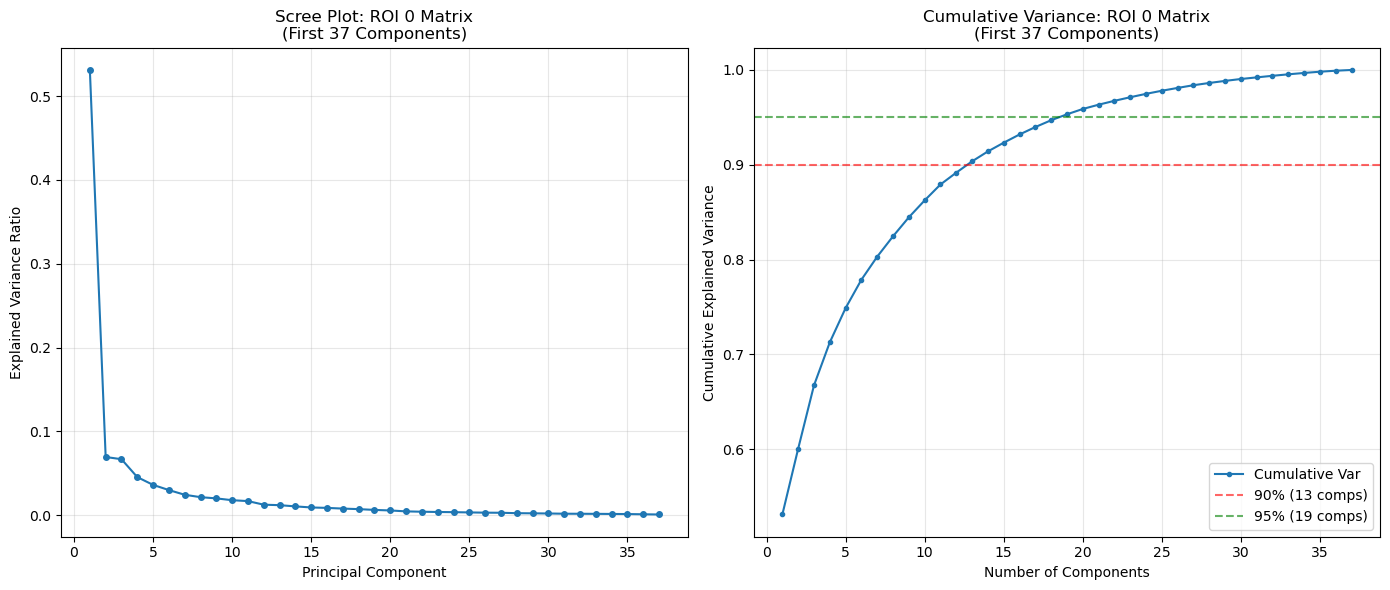


--- Running PCA on All ROIs Matrix ---
  Total available components: 1706
  Explained variance by first 10 components: 0.5796
  Components for 90% variance: 88
  Components for 95% variance: 160


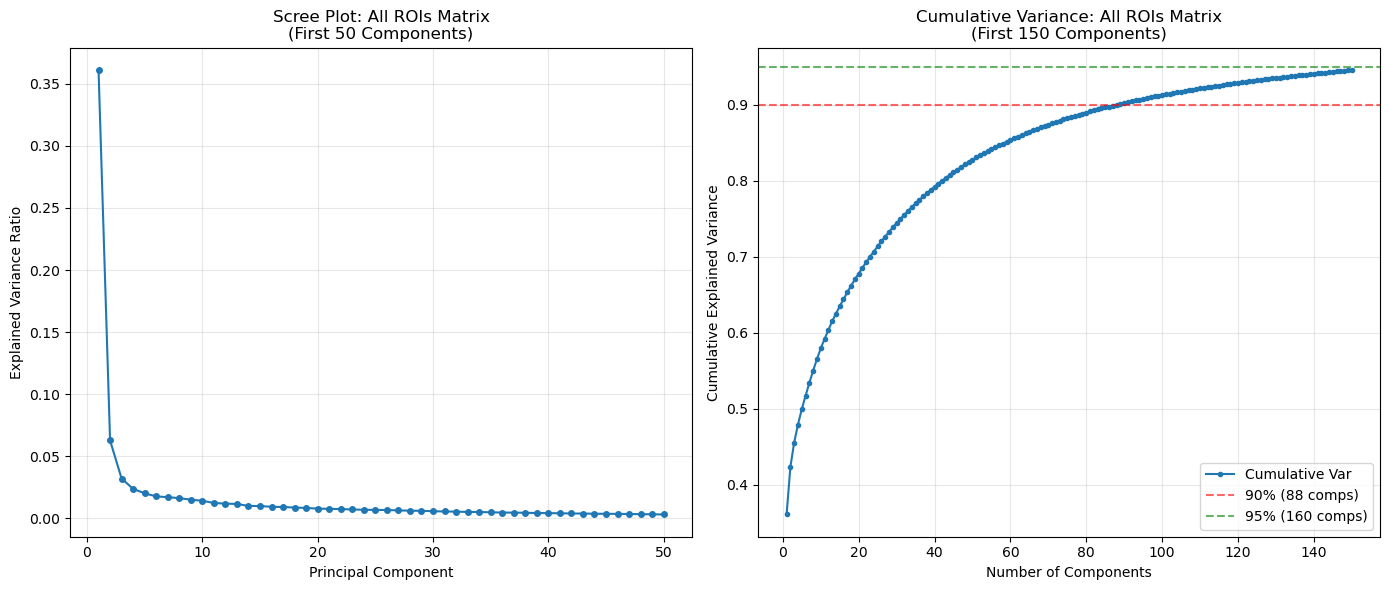

In [11]:
# %%
# ---------------------------------------------------------
# 5. PCA Analysis and Scree Plots
# ---------------------------------------------------------
from sklearn.decomposition import PCA

def analyze_and_plot_scree(matrix, matrix_name, n_components_plot=50):
    print(f"\n--- Running PCA on {matrix_name} ---")
    
    # Fit PCA
    # If n_components is not set, it keeps min(n_samples, n_features)
    pca = PCA() 
    pca.fit(matrix)
    
    var_ratio = pca.explained_variance_ratio_
    cum_var = np.cumsum(var_ratio)
    
    n_dims = len(var_ratio)
    print(f"  Total available components: {n_dims}")
    print(f"  Explained variance by first 10 components: {np.sum(var_ratio[:10]):.4f}")
    
    # Determine how many components reach 90% and 95% variance
    n_90 = np.argmax(cum_var >= 0.90) + 1 if np.any(cum_var >= 0.90) else n_dims
    n_95 = np.argmax(cum_var >= 0.95) + 1 if np.any(cum_var >= 0.95) else n_dims
    print(f"  Components for 90% variance: {n_90}")
    print(f"  Components for 95% variance: {n_95}")
    
    # Plotting
    plt.figure(figsize=(14, 6))
    
    # 1. Scree Plot (Variance Ratio)
    plt.subplot(1, 2, 1)
    limit = min(n_dims, n_components_plot)
    plt.plot(range(1, limit + 1), var_ratio[:limit], 'o-', markersize=4, label='Explained Var')
    plt.title(f'Scree Plot: {matrix_name}\n(First {limit} Components)')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True, alpha=0.3)
    
    # 2. Cumulative Variance
    plt.subplot(1, 2, 2)
    limit_cum = min(n_dims, 150) # Show slightly more for cumulative context
    plt.plot(range(1, limit_cum + 1), cum_var[:limit_cum], '.-', label='Cumulative Var')
    
    plt.axhline(y=0.90, color='r', linestyle='--', alpha=0.6, label=f'90% ({n_90} comps)')
    plt.axhline(y=0.95, color='g', linestyle='--', alpha=0.6, label=f'95% ({n_95} comps)')
    
    plt.title(f'Cumulative Variance: {matrix_name}\n(First {limit_cum} Components)')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Perform Analysis
analyze_and_plot_scree(roi0_pca_matrix, "ROI 0 Matrix")
analyze_and_plot_scree(all_rois_pca_matrix, "All ROIs Matrix")